In [1]:
import pandas as pd
import geopandas as gpd
import regex as re
import numpy as np

In [2]:
df_sg = pd.read_csv('daten/Ergebnisse/df_sg_n_FINAL.csv')

In [3]:
df_sg.shape

(887, 31)

In [4]:
df_sg.dtypes

GPLZ                                        int64
gemeinde                                   object
geometry                                   object
gml_id                                     object
OBJECTID                                    int64
Strasseneigentümer                         object
Emissionswert Tag                           int64
Emissionswert Nacht                         int64
Tagesverkehr Jahresmittel                 float64
Anzahl Fz Tag pro h                       float64
Anzahl Fz Nacht pro h                     float64
Prozentanteil lauter Fz Tag               float64
Prozentanteil lauter Fz Nacht             float64
Steigung                                  float64
Belagskorrektur                             int64
Tempo                                     float64
Faktor_Tag                                float64
Faktor_Nacht                              float64
Tunnel                                     object
Brücke                                     object


In [5]:
#Schauen, ob Daten *doch noch* Doppelte enthalten ...
df_sg[df_sg['strasse'].duplicated()].sort_values('strasse')

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Verkehrserhebung,Emissionswert__Lre__Tram_Tag__dB_A__,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname
786,9000,St.Gallen,MULTILINESTRING Z ((1255393.619600002 2748935....,Laermemission.8232,8232,GS,61,50,800.0,45.0,...,NaN,NaN,NaN,1255386.065900002 2748919.897700001 0,"(47.4324151893062, 9.412758669938288)","Achslenstrasse 12, 9016 St.Gallen, Switzerland",Achslenstrasse 12,9016 St.Gallen,9016,St.Gallen
602,9000,St.Gallen,MULTILINESTRING Z ((1255680.129900001 2747364....,Laermemission.9569,9569,GS,73,61,5300.0,300.0,...,NaN,NaN,NaN,1255658.0337 2747311.613000002 0)),"(47.4352225483372, 9.391537300282904)","Bachstrasse 29, 9008 St.Gallen, Switzerland",Bachstrasse 29,9008 St.Gallen,9008,St.Gallen
111,9000,St.Gallen,MULTILINESTRING Z ((1254593.450599998 2746011....,Laermemission.8446,8446,GS,76,68,9300.0,524.0,...,NaN,NaN,NaN,1254608.013500001 2746008.9553 0,"(47.426071809246594, 9.37393165259965)","Bahnhofstrasse 2, 9000 St.Gallen, Switzerland",Bahnhofstrasse 2,9000 St.Gallen,9000,St.Gallen
766,9000,St.Gallen,MULTILINESTRING Z ((1251848.976799998 2740792....,Laermemission.9484,9484,GS,76,67,7900.0,454.0,...,NaN,NaN,NaN,1251844.7194 2740797.898600001 0)),"(47.40236094076094, 9.304016398564753)","Biderstrasse 15, 9015 St.Gallen, Switzerland",Biderstrasse 15,9015 St.Gallen,9015,St.Gallen
175,9000,St.Gallen,MULTILINESTRING Z ((1254642.564800002 2746324....,Laermemission.8729,8729,KS,75,68,8200.0,457.0,...,NaN,NaN,NaN,1254641.351799998 2746343.3026 0,"(47.42629730015778, 9.378372446384605)","Brühltor-Passage 1, 9000 St.Gallen, Switzerland",Brühltor-Passage 1,9000 St.Gallen,9000,St.Gallen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,9000,St.Gallen,MULTILINESTRING Z ((1254493.754000001 2746970....,Laermemission.9012,9012,KS,74,60,4400.0,253.0,...,NaN,62.9,56.5,1254496.261399999 2746980.327399999 0,"(47.42485077825742, 9.386764845789028)","Wildeggstrasse 46, 9000 St.Gallen, Switzerland",Wildeggstrasse 46,9000 St.Gallen,9000,St.Gallen
228,9000,St.Gallen,MULTILINESTRING Z ((1254548.731899999 2745686....,Laermemission.8810,8810,GS,72,57,2800.0,161.0,...,NaN,NaN,NaN,1254497.153099999 2745648.8475 0)),"(47.42515481911186, 9.369124306625407)","Winkelriedstrasse 20, 9000 St.Gallen, Switzerland",Winkelriedstrasse 20,9000 St.Gallen,9000,St.Gallen
312,9000,St.Gallen,MULTILINESTRING Z ((1254556.100299999 2745691....,Laermemission.9242,9242,GS,61,49,1000.0,54.0,...,NaN,NaN,NaN,1254551.704100002 2745676.312100001 0,"(47.425639228695424, 9.369505981703966)","Winkelriedstrasse 27, 9000 St.Gallen, Switzerland",Winkelriedstrasse 27,9000 St.Gallen,9000,St.Gallen
227,9000,St.Gallen,MULTILINESTRING Z ((1254556.100299999 2745691....,Laermemission.8809,8809,GS,70,55,2800.0,161.0,...,NaN,NaN,NaN,1254548.731899999 2745686.237199999 0)),"(47.425610307449716, 9.36963651212793)","Zwinglistrasse 21, 9000 St.Gallen, Switzerland",Zwinglistrasse 21,9000 St.Gallen,9000,St.Gallen


## 1. Auswertungen

### 1.1 Wo ist es in der Stadt St.Gallen Tag/Nacht am lautesten/am stillsten?

In [6]:
#Wo ist es am lautesten, am Tag und in der Nacht?
df_sg[['Emissionswert Tag', 'Emissionswert Nacht']].max()

Emissionswert Tag      80
Emissionswert Nacht    73
dtype: int64

In [7]:
#Am lautesten ist es am Tag mit 80 Dezibeln an folgenden Stellen
df_sg[df_sg['Emissionswert Tag'] >= 80]

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Verkehrserhebung,Emissionswert__Lre__Tram_Tag__dB_A__,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname
20,9000,St.Gallen,MULTILINESTRING Z ((1253942.8972 2745441.3607 ...,Laermemission.9494,9494,KS,80,72,25000.0,1421.0,...,NaN,NaN,NaN,1253936.986299999 2745449.5174 0)),"(47.42021717444648, 9.366194810250766)","Geltenwilenstrasse 2, 9000 St.Gallen, Switzerland",Geltenwilenstrasse 2,9000 St.Gallen,9000,St.Gallen
68,9000,St.Gallen,MULTILINESTRING Z ((1256493.298599999 2748943....,Laermemission.9576,9576,KS,80,72,20900.0,1189.0,...,NaN,NaN,NaN,1256485.2663 2748951.073899999 0)),"(47.4423653136276, 9.41343496980909)","Rorschacher Strasse 283, 9016 St.Gallen, Switz...",Rorschacher Strasse 283,9016 St.Gallen,9016,St.Gallen
238,9000,St.Gallen,MULTILINESTRING Z ((1254664.340999998 2745976....,Laermemission.8859,8859,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254672.893100001 2745985.9406 0,"(47.426660270887346, 9.373647931585735)","Blumenbergpl. 6, 9000 St.Gallen, Switzerland",Blumenbergpl. 6,9000 St.Gallen,9000,St.Gallen
362,9000,St.Gallen,MULTILINESTRING Z ((1254010.984200001 2745355....,Laermemission.9495,9495,KS,80,72,25000.0,1421.0,...,NaN,NaN,NaN,1253999.467799999 2745370.240899999 0,"(47.420741535582096, 9.365271032099855)","447 69, 9000 St.Gallen, Switzerland",St.Leonhard-Strasse 69,9000 St.Gallen,9000,St.Gallen
474,9000,St.Gallen,MULTILINESTRING Z ((1254681.7027 2745995.01139...,Laermemission.10447,10447,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254713.2707 2746019.978500001 0,"(47.427015768688996, 9.374112117877283)","Augustinergasse 23, 9000 St.Gallen, Switzerland",Augustinergasse 23,9000 St.Gallen,9000,St.Gallen
475,9000,St.Gallen,MULTILINESTRING Z ((1254824.059599999 2746120....,Laermemission.10448,10448,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254808.6283 2746102.587299999 0,"(47.42785482749404, 9.375237844783522)","Unterer Graben 26, 9000 St.Gallen, Switzerland",Unterer Graben 26,9000 St.Gallen,9000,St.Gallen
476,9000,St.Gallen,MULTILINESTRING Z ((1254862.4749 2746177.02250...,Laermemission.10449,10449,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254859.8849 2746167.337699998 0,"(47.42830131462184, 9.37611254890299)","Hauptstrasse 7 39, 9000 St.Gallen, Switzerland",Unterer Graben 39,9000 St.Gallen,9000,St.Gallen
477,9000,St.Gallen,MULTILINESTRING Z ((1254860.149700001 2746255....,Laermemission.10450,10450,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254860.7027 2746246.406399999 0,"(47.428291100546566, 9.377160466337878)","St.Jakob-Strasse 55, 9000 St.Gallen, Switzerland",St.Jakob-Strasse 55,9000 St.Gallen,9000,St.Gallen
725,9000,St.Gallen,MULTILINESTRING Z ((1252435.119800001 2741586....,Laermemission.9094,9094,KS,80,71,17700.0,1013.0,...,NaN,NaN,NaN,1252433.500700001 2741642.0189 0,"(47.40747396154172, 9.315382229847158)","Russen, 9015 St.Gallen, Switzerland",Russen,9015 St.Gallen,9015,St.Gallen
726,9000,St.Gallen,MULTILINESTRING Z ((1252434.919 2741712.484999...,Laermemission.9095,9095,KS,80,71,17700.0,1013.0,...,NaN,NaN,NaN,1252436.6457 2741747.6877 0,"(47.407479496500294, 9.316782803348634)","Sonnmattstrasse 39C, 9015 St.Gallen, Switzerland",Sonnmattstrasse 39C,9015 St.Gallen,9015,St.Gallen


In [8]:
df_sgTag = df_sg[df_sg['Emissionswert Tag'] >= 80]

In [9]:
df_sgTag.shape

(12, 31)

In [10]:
df_sgTag['strasse'].value_counts()

Geltenwilenstrasse 2       1
Rorschacher Strasse 283    1
Blumenbergpl. 6            1
St.Leonhard-Strasse 69     1
Augustinergasse 23         1
Unterer Graben 26          1
Unterer Graben 39          1
St.Jakob-Strasse 55        1
Russen                     1
Sonnmattstrasse 39C        1
Zürcherstrasse 431         1
Rorschacher Str. 283       1
Name: strasse, dtype: int64

In [11]:
df_sgTag.to_csv('daten/Ergebnisse/df_sgTag.csv', index = False)

In [12]:
#Am lautesten ist es in der Nacht mit 76 Dezibeln an folgenden Stellen:
df_sg[df_sg['Emissionswert Nacht'] >= 73].head(10)

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Verkehrserhebung,Emissionswert__Lre__Tram_Tag__dB_A__,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname
238,9000,St.Gallen,MULTILINESTRING Z ((1254664.340999998 2745976....,Laermemission.8859,8859,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254672.893100001 2745985.9406 0,"(47.426660270887346, 9.373647931585735)","Blumenbergpl. 6, 9000 St.Gallen, Switzerland",Blumenbergpl. 6,9000 St.Gallen,9000,St.Gallen
474,9000,St.Gallen,MULTILINESTRING Z ((1254681.7027 2745995.01139...,Laermemission.10447,10447,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254713.2707 2746019.978500001 0,"(47.427015768688996, 9.374112117877283)","Augustinergasse 23, 9000 St.Gallen, Switzerland",Augustinergasse 23,9000 St.Gallen,9000,St.Gallen
475,9000,St.Gallen,MULTILINESTRING Z ((1254824.059599999 2746120....,Laermemission.10448,10448,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254808.6283 2746102.587299999 0,"(47.42785482749404, 9.375237844783522)","Unterer Graben 26, 9000 St.Gallen, Switzerland",Unterer Graben 26,9000 St.Gallen,9000,St.Gallen
476,9000,St.Gallen,MULTILINESTRING Z ((1254862.4749 2746177.02250...,Laermemission.10449,10449,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254859.8849 2746167.337699998 0,"(47.42830131462184, 9.37611254890299)","Hauptstrasse 7 39, 9000 St.Gallen, Switzerland",Unterer Graben 39,9000 St.Gallen,9000,St.Gallen
477,9000,St.Gallen,MULTILINESTRING Z ((1254860.149700001 2746255....,Laermemission.10450,10450,KS,80,73,23700.0,1319.0,...,NaN,NaN,NaN,1254860.7027 2746246.406399999 0,"(47.428291100546566, 9.377160466337878)","St.Jakob-Strasse 55, 9000 St.Gallen, Switzerland",St.Jakob-Strasse 55,9000 St.Gallen,9000,St.Gallen


In [13]:
df_sgNacht = df_sg[df_sg['Emissionswert Nacht'] >= 73]

In [14]:
df_sgNacht.shape

(5, 31)

In [15]:
df_sgNacht['strasse'].value_counts()

Blumenbergpl. 6        1
Augustinergasse 23     1
Unterer Graben 26      1
Unterer Graben 39      1
St.Jakob-Strasse 55    1
Name: strasse, dtype: int64

In [16]:
df_sgNacht.to_csv('daten/Ergebnisse/df_sgNacht.csv', index = False)

### 1.2 Wo ist es am stillsten?

In [17]:
#Wo ist es am stillsten, am Tag und in der Nacht?
df_sg[['Emissionswert Tag', 'Emissionswert Nacht']].min()

Emissionswert Tag      52
Emissionswert Nacht    40
dtype: int64

In [18]:
df_sg[df_sg['Emissionswert Tag'] <= 52]

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Verkehrserhebung,Emissionswert__Lre__Tram_Tag__dB_A__,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname
230,9000,St.Gallen,MULTILINESTRING Z ((1253648.873799998 2744476....,Laermemission.8821,8821,GS,52,40,200.0,12.0,...,NaN,NaN,NaN,1253654.714299999 2744471.534000002 0,"(47.417839593012495, 9.35325339270581)","Dürrenmattstrasse 30, 9000 St.Gallen, Switzerland",Dürrenmattstrasse 30,9000 St.Gallen,9000,St.Gallen


In [19]:
df_sg[df_sg['Emissionswert Nacht'] <= 40]

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Verkehrserhebung,Emissionswert__Lre__Tram_Tag__dB_A__,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname
230,9000,St.Gallen,MULTILINESTRING Z ((1253648.873799998 2744476....,Laermemission.8821,8821,GS,52,40,200.0,12.0,...,NaN,NaN,NaN,1253654.714299999 2744471.534000002 0,"(47.417839593012495, 9.35325339270581)","Dürrenmattstrasse 30, 9000 St.Gallen, Switzerland",Dürrenmattstrasse 30,9000 St.Gallen,9000,St.Gallen


### 1.3 Unterteilung und Plot nach Grenzwerten

Lärm ist nicht gleich Lärm. Je nachdem, wo sich ein Haus befindet (Wohn-, Gewerbe- oder Industriezone) gelten für tagsüber und in der Nacht andere Grenzwerte.

Da es sich bei den vorliegenden Daten um solche zu den Emissionen handelt, also dem Lärm am Strassenrand, sind keine Informationen zur Zone hinterlegt. Dazu unten gleich mehr. 

In [20]:
#csv mit Grenzwerten einlesen
df_grenzwerte = pd.read_csv('daten/grenzwerte.csv')

In [21]:
df_grenzwerte

,Empfindlichkeitsstufe,tageszeit,planungswert,Grenzwert,alarmwert
0,Erholung,Tag,50,55,65
1,Erholung,Nacht,40,45,60
2,Wohnen,Tag,55,60,70
3,Wohnen,Nacht,45,50,65
4,Wohnen/Gewerbe,Tag,60,65,70
5,Wohnen/Gewerbe,Nacht,50,55,65
6,Industrie,Tag,65,70,75
7,Industrie,Nacht,55,60,70


#### Einteilung Gebiete

In der Stadt St.Gallen sind die Gebiete Wohnen und Wohnen/Gewerbe am verbreitesten. Industriezonen gibt es vor allem am Stadtrand im Westen und Osten. Einteilung also unter Berücksichtigung dieser Grenz- und Alarmwerte:

Am Tag
- gelb: bis und mit 59 Dezibel
- orange: 60 bis 69 Dezibel
- rot: 70 oder mehr Dezibel

In der Nacht
- gelb: bis und mit 49 Dezibel
- orange: 50 bis 64 Dezibel
- rot: 65 oder mehr Dezibel

In [22]:
bin_values_tag = [
    0,
    59,
    69,
    np.inf]

bin_values_nacht = [
    0,
    49,
    64,
    np.inf]

In [23]:
bin_label_tag = [
    "1. unter 60 Dezibel",
    "2. 60 bis 69 Dezibel",
    "3. über 70 Dezibel"]
bin_label_nacht = [
    "1. unter 50 Dezibel",
    "2. 50 bis 64 Dezibel",
    "3. über 65 Dezibel"]

colors_tag = {
    "1. unter 60 Dezibel" : "yellow",
    "2. 60 bis 69 Dezibel" : "orange",
    "3. über 70 Dezibel": "red"}

colors_nacht = {
    "1. unter 50 Dezibel" : "yellow",
    "2. 50 bis 64 Dezibel" : "orange",
    "3. über 65 Dezibel" : "red"}

In [24]:
df_sg['Kategorie Emissionswert Tag'] = pd.cut(df_sg['Emissionswert Tag'], bin_values_tag, labels=bin_label_tag, include_lowest=True).astype(str)

In [25]:
df_sg['Kategorie Emissionswert Nacht'] = pd.cut(df_sg['Emissionswert Nacht'], bin_values_nacht, labels=bin_label_nacht, include_lowest=True).astype(str)

In [26]:
df_sg.head(5)

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname,Kategorie Emissionswert Tag,Kategorie Emissionswert Nacht
0,9000,St.Gallen,MULTILINESTRING Z ((1255393.619600002 2748935....,Laermemission.8232,8232,GS,61,50,800.0,45.0,...,NaN,1255386.065900002 2748919.897700001 0,"(47.43247968717648, 9.412961369825302)","Achslenstrasse 12, 9016 St.Gallen, Switzerland",Achslenstrasse 12,9016 St.Gallen,9016,St.Gallen,2. 60 bis 69 Dezibel,2. 50 bis 64 Dezibel
1,9000,St.Gallen,MULTILINESTRING Z ((1255680.129900001 2747364....,Laermemission.9569,9569,GS,73,61,5300.0,300.0,...,NaN,1255658.0337 2747311.613000002 0)),"(47.43540935110947, 9.392247063873524)","Bachstrasse 29, 9008 St.Gallen, Switzerland",Bachstrasse 29,9008 St.Gallen,9008,St.Gallen,3. über 70 Dezibel,2. 50 bis 64 Dezibel
2,9000,St.Gallen,MULTILINESTRING Z ((1254593.450599998 2746011....,Laermemission.10112,10112,GS,70,56,2800.0,164.0,...,56.5,1254596.963500001 2746031.5328 0)),"(47.42594025862695, 9.373963338982252)","Bahnhofstrasse 2, 9000 St.Gallen, Switzerland",Bahnhofstrasse 2,9000 St.Gallen,9000,St.Gallen,3. über 70 Dezibel,2. 50 bis 64 Dezibel
3,9000,St.Gallen,MULTILINESTRING Z ((1251848.976799998 2740792....,Laermemission.9484,9484,GS,76,67,7900.0,454.0,...,NaN,1251844.7194 2740797.898600001 0)),"(47.402400437014414, 9.303942474169684)","Biderstrasse 15, 9015 St.Gallen, Switzerland",Biderstrasse 15,9015 St.Gallen,9015,St.Gallen,3. über 70 Dezibel,3. über 65 Dezibel
4,9000,St.Gallen,MULTILINESTRING Z ((1252382.712699998 2743241....,Laermemission.8953,8953,GS,72,58,3300.0,192.0,...,NaN,1252394.3849 2743255.776799999 0,"(47.40667126014492, 9.336548568019525)","Boppartstrasse 4, 9014 St.Gallen, Switzerland",Boppartstrasse 4,9014 St.Gallen,9014,St.Gallen,3. über 70 Dezibel,2. 50 bis 64 Dezibel


In [27]:
df_sg.sort_values(['Kategorie Emissionswert Tag', 'Emissionswert Tag'], ascending = [True, True])

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,Emissionswert__Lre__Tram_Nacht__dB_A__,Coordinates,gps,addresses,strasse,addressteil,plz,dorfname,Kategorie Emissionswert Tag,Kategorie Emissionswert Nacht
230,9000,St.Gallen,MULTILINESTRING Z ((1253648.873799998 2744476....,Laermemission.8821,8821,GS,52,40,200.0,12.0,...,NaN,1253654.714299999 2744471.534000002 0,"(47.417839593012495, 9.35325339270581)","Dürrenmattstrasse 30, 9000 St.Gallen, Switzerland",Dürrenmattstrasse 30,9000 St.Gallen,9000,St.Gallen,1. unter 60 Dezibel,1. unter 50 Dezibel
246,9000,St.Gallen,MULTILINESTRING Z ((1255636.645 2748167.046700...,Laermemission.8867,8867,GS,54,45,400.0,21.0,...,NaN,1255588.523699999 2748116.598499998 0,"(47.43441685021144, 9.402181490902048)","Scheidwegstrasse 20, 9000 St.Gallen, Switzerland",Scheidwegstrasse 20,9000 St.Gallen,9000,St.Gallen,1. unter 60 Dezibel,1. unter 50 Dezibel
459,9000,St.Gallen,MULTILINESTRING Z ((1253520.151900001 2744946....,Laermemission.10349,10349,GS,54,45,400.0,22.0,...,NaN,1253531.423500001 2744962.4375 0,"(47.416623098584324, 9.359716549753504)","Kirche St.Otmar, Vonwilstrasse 11, 9000 St.Gal...",Vonwilstrasse 11,9000 St.Gallen,9000,St.Gallen,1. unter 60 Dezibel,1. unter 50 Dezibel
460,9000,St.Gallen,MULTILINESTRING Z ((1253587.9016 2745038.6917 ...,Laermemission.10350,10350,GS,54,45,400.0,22.0,...,NaN,1253593.6712 2745046.7388 0,"(47.417164222399656, 9.360853501020141)","Paradiesstrasse 40, 9000 St.Gallen, Switzerland",Paradiesstrasse 40,9000 St.Gallen,9000,St.Gallen,1. unter 60 Dezibel,1. unter 50 Dezibel
463,9000,St.Gallen,MULTILINESTRING Z ((1253728.802999999 2745182....,Laermemission.10353,10353,GS,54,45,400.0,22.0,...,NaN,1253751.1226 2745200.696899999 0,"(47.418545988029344, 9.362944182697689)","Paradiesstrasse 12, 9000 St.Gallen, Switzerland",Paradiesstrasse 12,9000 St.Gallen,9000,St.Gallen,1. unter 60 Dezibel,1. unter 50 Dezibel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,9000,St.Gallen,MULTILINESTRING Z ((1254860.149700001 2746255....,Laermemission.10450,10450,KS,80,73,23700.0,1319.0,...,NaN,1254860.7027 2746246.406399999 0,"(47.428291100546566, 9.377160466337878)","St.Jakob-Strasse 55, 9000 St.Gallen, Switzerland",St.Jakob-Strasse 55,9000 St.Gallen,9000,St.Gallen,3. über 70 Dezibel,3. über 65 Dezibel
725,9000,St.Gallen,MULTILINESTRING Z ((1252435.119800001 2741586....,Laermemission.9094,9094,KS,80,71,17700.0,1013.0,...,NaN,1252433.500700001 2741642.0189 0,"(47.40747396154172, 9.315382229847158)","Russen, 9015 St.Gallen, Switzerland",Russen,9015 St.Gallen,9015,St.Gallen,3. über 70 Dezibel,3. über 65 Dezibel
726,9000,St.Gallen,MULTILINESTRING Z ((1252434.919 2741712.484999...,Laermemission.9095,9095,KS,80,71,17700.0,1013.0,...,NaN,1252436.6457 2741747.6877 0,"(47.407479496500294, 9.316782803348634)","Sonnmattstrasse 39C, 9015 St.Gallen, Switzerland",Sonnmattstrasse 39C,9015 St.Gallen,9015,St.Gallen,3. über 70 Dezibel,3. über 65 Dezibel
728,9000,St.Gallen,MULTILINESTRING Z ((1252397.8814 2741171.62979...,Laermemission.9097,9097,KS,80,71,21000.0,1200.0,...,NaN,1252397.0616 2741212.619899999 0,"(47.407238562843204, 9.309683343601424)","Zürcherstrasse 431, 9015 St.Gallen, Switzerland",Zürcherstrasse 431,9015 St.Gallen,9015,St.Gallen,3. über 70 Dezibel,3. über 65 Dezibel


In [28]:
df_sg.to_csv('daten/Ergebnisse/df_sg-mit-Kategorie.csv', index = False)

In [29]:
df_sg.groupby('Kategorie Emissionswert Tag')['Emissionswert Tag'].max()

Kategorie Emissionswert Tag
1. unter 60 Dezibel     59
2. 60 bis 69 Dezibel    69
3. über 70 Dezibel      80
Name: Emissionswert Tag, dtype: int64

In [30]:
df_sg.groupby('Kategorie Emissionswert Nacht')['Emissionswert Nacht'].max()

Kategorie Emissionswert Nacht
1. unter 50 Dezibel     49
2. 50 bis 64 Dezibel    64
3. über 65 Dezibel      73
Name: Emissionswert Nacht, dtype: int64

#### Karte der Stadt via Open Street Map einbinden

Da dieses File sehr gross ist, bitte zuvor hier in den Ordner "daten" downloaden: http://download.geofabrik.de/europe/switzerland.html

In [31]:
gdf_osm = gpd.read_file("daten/switzerland-latest-free.shp/gis_osm_buildings_a_free_1.shp", encoding="utf-8")

In [32]:
from shapely.geometry import Point, LineString, Polygon

In [33]:
#Gebiet festlegen 

north, south, east, west = 47.4512, 47.39812, 9.4194, 9.28396

StGallen = Polygon([[west, north], [east, north], [east, south], [west, south]])

In [34]:
StGallen.wkt

'POLYGON ((9.28396 47.4512, 9.4194 47.4512, 9.4194 47.39812, 9.28396 47.39812, 9.28396 47.4512))'

In [35]:
gdf_stgallen = gdf_osm[gdf_osm.within(StGallen)]

<AxesSubplot:>

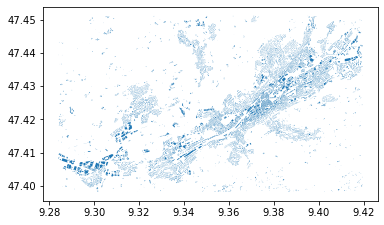

In [36]:
gdf_stgallen.plot()

#### Erstellen des neuen Geodatenframes mit Point
-> mit der Spalte "geometry" lässt sich nichts anstellen, weil Longitude und Latitude vertauscht

#### Datencleaning, um df_sg korrekt mit Geopandas plotten zu können

In [37]:
#Klammern in gps entfernen
df_sg['gps'] = df_sg['gps'].apply(lambda x: re.sub(r'[\([{})\]]', '', str(x)))

In [38]:
coordinates = []
lat = []
long = []

for i in (range(len(df_sg))):
    elem = df_sg['gps'].iloc[i].split()
    coordinates.append(elem)
    
    el_la = coordinates[i][0]
    lat.append(el_la)
    el_lo = coordinates[i][1]
    long.append(el_lo)

In [39]:
lat

['47.43247968717648,',
 '47.43540935110947,',
 '47.42594025862695,',
 '47.402400437014414,',
 '47.40667126014492,',
 '47.42631230469604,',
 '47.43104086200745,',
 '47.429534144785954,',
 '47.4210791130961,',
 '47.424807125513176,',
 '47.42350067999754,',
 '47.431504876312125,',
 '47.41831718122099,',
 '47.41778609381801,',
 '47.43753560528541,',
 '47.4315979513825,',
 '47.42825689133923,',
 '47.42845700977413,',
 '47.41098543755739,',
 '47.421409218795745,',
 '47.42021717444648,',
 '47.420987253908116,',
 '47.420021558327115,',
 '47.419915190109755,',
 '47.41238211680126,',
 '47.432778160310235,',
 '47.41036284435052,',
 '47.408970111434265,',
 '47.42765411240592,',
 '47.42242289154196,',
 '47.40836686480259,',
 '47.4097212323557,',
 '47.409841172441034,',
 '47.40733299779333,',
 '47.437522465531345,',
 '47.436700900151536,',
 '47.429660496748575,',
 '47.4036722632176,',
 '47.44056807924996,',
 '47.44098965960144,',
 '47.424392450666254,',
 '47.44158473860958,',
 '47.40706898104604,',


In [40]:
lat_new = [re.sub(r'\W$','', i ) for i in lat]

In [41]:
lat_new

['47.43247968717648',
 '47.43540935110947',
 '47.42594025862695',
 '47.402400437014414',
 '47.40667126014492',
 '47.42631230469604',
 '47.43104086200745',
 '47.429534144785954',
 '47.4210791130961',
 '47.424807125513176',
 '47.42350067999754',
 '47.431504876312125',
 '47.41831718122099',
 '47.41778609381801',
 '47.43753560528541',
 '47.4315979513825',
 '47.42825689133923',
 '47.42845700977413',
 '47.41098543755739',
 '47.421409218795745',
 '47.42021717444648',
 '47.420987253908116',
 '47.420021558327115',
 '47.419915190109755',
 '47.41238211680126',
 '47.432778160310235',
 '47.41036284435052',
 '47.408970111434265',
 '47.42765411240592',
 '47.42242289154196',
 '47.40836686480259',
 '47.4097212323557',
 '47.409841172441034',
 '47.40733299779333',
 '47.437522465531345',
 '47.436700900151536',
 '47.429660496748575',
 '47.4036722632176',
 '47.44056807924996',
 '47.44098965960144',
 '47.424392450666254',
 '47.44158473860958',
 '47.40706898104604',
 '47.41235524185776',
 '47.41271117585679',

In [42]:
df_sg['latitude'] = lat_new
df_sg['longitude'] = long

In [43]:
df_sg.head(3)

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,gps,addresses,strasse,addressteil,plz,dorfname,Kategorie Emissionswert Tag,Kategorie Emissionswert Nacht,latitude,longitude
0,9000,St.Gallen,MULTILINESTRING Z ((1255393.619600002 2748935....,Laermemission.8232,8232,GS,61,50,800.0,45.0,...,"47.43247968717648, 9.412961369825302","Achslenstrasse 12, 9016 St.Gallen, Switzerland",Achslenstrasse 12,9016 St.Gallen,9016,St.Gallen,2. 60 bis 69 Dezibel,2. 50 bis 64 Dezibel,47.43247968717648,9.412961369825302
1,9000,St.Gallen,MULTILINESTRING Z ((1255680.129900001 2747364....,Laermemission.9569,9569,GS,73,61,5300.0,300.0,...,"47.43540935110947, 9.392247063873524","Bachstrasse 29, 9008 St.Gallen, Switzerland",Bachstrasse 29,9008 St.Gallen,9008,St.Gallen,3. über 70 Dezibel,2. 50 bis 64 Dezibel,47.43540935110947,9.392247063873524
2,9000,St.Gallen,MULTILINESTRING Z ((1254593.450599998 2746011....,Laermemission.10112,10112,GS,70,56,2800.0,164.0,...,"47.42594025862695, 9.373963338982252","Bahnhofstrasse 2, 9000 St.Gallen, Switzerland",Bahnhofstrasse 2,9000 St.Gallen,9000,St.Gallen,3. über 70 Dezibel,2. 50 bis 64 Dezibel,47.42594025862695,9.373963338982252


In [44]:
df_sg.to_csv('daten/Ergebnisse/df_sgFINAL.csv', index = False)

In [45]:
df_sg.dtypes

GPLZ                                        int64
gemeinde                                   object
geometry                                   object
gml_id                                     object
OBJECTID                                    int64
Strasseneigentümer                         object
Emissionswert Tag                           int64
Emissionswert Nacht                         int64
Tagesverkehr Jahresmittel                 float64
Anzahl Fz Tag pro h                       float64
Anzahl Fz Nacht pro h                     float64
Prozentanteil lauter Fz Tag               float64
Prozentanteil lauter Fz Nacht             float64
Steigung                                  float64
Belagskorrektur                             int64
Tempo                                     float64
Faktor_Tag                                float64
Faktor_Nacht                              float64
Tunnel                                     object
Brücke                                     object


In [46]:
df_sg['longitude'] = df_sg['longitude'].astype('float64')

In [47]:
df_sg['latitude'] = df_sg['latitude'].astype('float64')

In [48]:
df_sg.dtypes

GPLZ                                        int64
gemeinde                                   object
geometry                                   object
gml_id                                     object
OBJECTID                                    int64
Strasseneigentümer                         object
Emissionswert Tag                           int64
Emissionswert Nacht                         int64
Tagesverkehr Jahresmittel                 float64
Anzahl Fz Tag pro h                       float64
Anzahl Fz Nacht pro h                     float64
Prozentanteil lauter Fz Tag               float64
Prozentanteil lauter Fz Nacht             float64
Steigung                                  float64
Belagskorrektur                             int64
Tempo                                     float64
Faktor_Tag                                float64
Faktor_Nacht                              float64
Tunnel                                     object
Brücke                                     object


In [49]:
#Punkt kreeiren

df_sg['Punkt'] = df_sg.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

/Applications/anaconda3/envs/geopandas/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [50]:
gdf_sg2 = gpd.GeoDataFrame(df_sg, geometry = 'Punkt', crs='epsg:4326')

<AxesSubplot:>

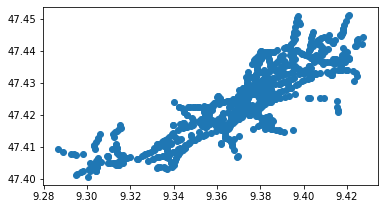

In [51]:
gdf_sg2.plot()

<AxesSubplot:>

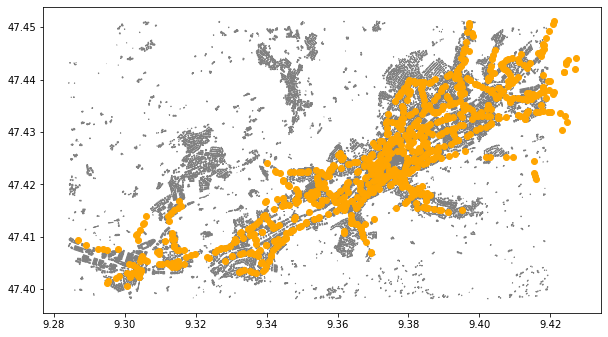

In [52]:
ax = gdf_stgallen.plot(figsize = (10,30), color='grey', edgecolor='grey')
gdf_sg2.plot(color = 'orange', ax = ax)

### Kategorien farbig darstellen

In [53]:
colorlist = gdf_sg2['Kategorie Emissionswert Tag'].apply(lambda typ: colors_tag[typ])
colorlist = gdf_sg2['Kategorie Emissionswert Nacht'].apply(lambda typ: colors_nacht[typ])

<AxesSubplot:>

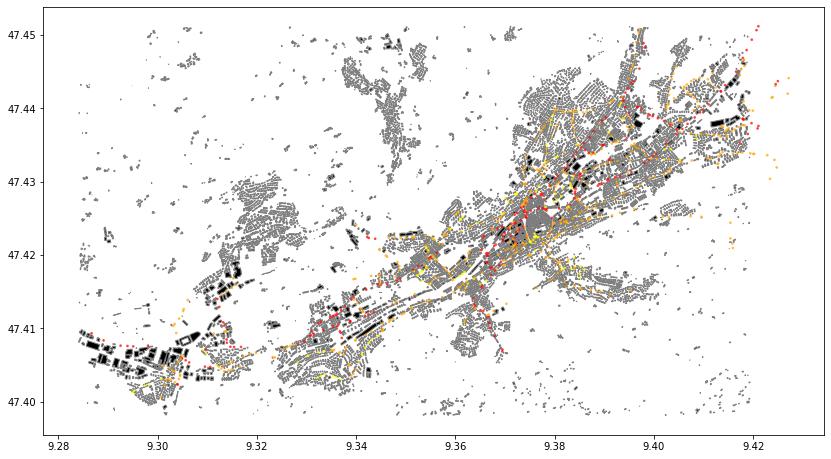

In [54]:
ax = gdf_stgallen.plot(figsize=(14,10), color='black', edgecolor='grey')
gdf_sg2.plot(markersize=3, ax=ax, color=colorlist, alpha=0.6)

In [55]:
gdf_strassen = gpd.read_file('daten/gemeindestrassenplan')

<AxesSubplot:>

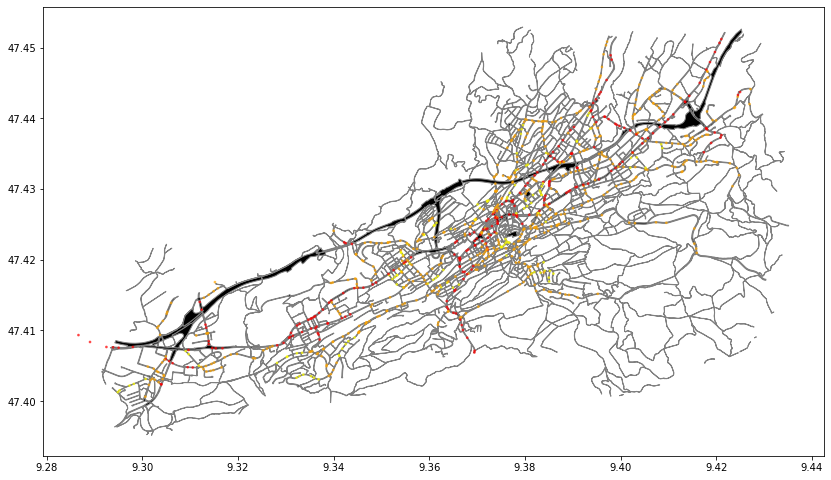

In [56]:
ax = gdf_strassen.plot(figsize=(14,10), color='black', edgecolor='grey')
gdf_sg2.plot(markersize=3, ax=ax, color=colorlist, alpha=0.6)

In [57]:
gdf_quartiere = gpd.read_file('daten/wohnviertel')

<AxesSubplot:>

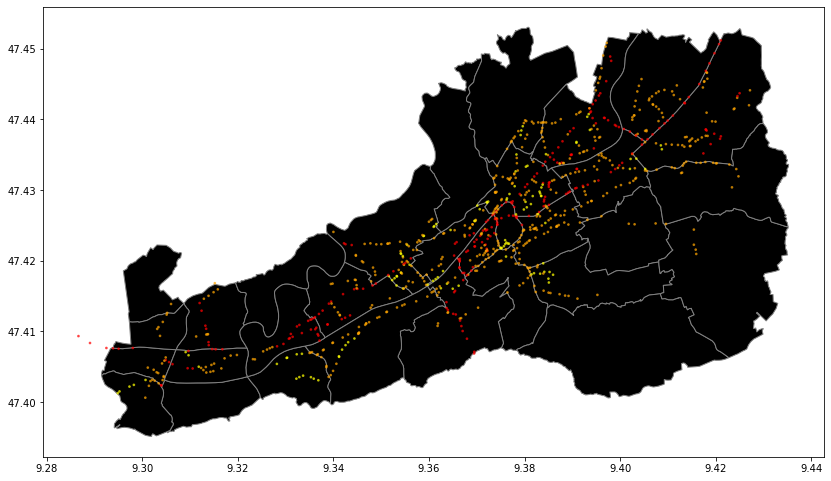

In [58]:
ax = gdf_quartiere.plot(figsize=(14,10), color='black', edgecolor='grey')
gdf_sg2.plot(markersize=3, ax=ax, color=colorlist, alpha=0.6)

### 1.4 Wie oft und wo Grenz- bzw. Alarmwert erreicht

Achtung, eigene Festlegung, da keine Infos zur Nutzung vorhanden.

Wenn Kategorie 2 = Grenzwert erreicht
Wenn Kategorie 3 = Alarmwert erreicht

In [59]:
df_sg['Kategorie Emissionswert Tag'].value_counts()

3. über 70 Dezibel      552
2. 60 bis 69 Dezibel    287
1. unter 60 Dezibel      48
Name: Kategorie Emissionswert Tag, dtype: int64

In [60]:
df_sg['Kategorie Emissionswert Nacht'].value_counts()

2. 50 bis 64 Dezibel    537
3. über 65 Dezibel      233
1. unter 50 Dezibel     117
Name: Kategorie Emissionswert Nacht, dtype: int64

Strassen sortiert nach Kategorie Emissionswert Tag

In [61]:
df_kategorienTAG = df_sg.groupby(['Kategorie Emissionswert Tag', 'strasse'])['Emissionswert Tag'].max().to_frame()

In [62]:
df_kategorienTAG.reset_index(inplace = True)

In [63]:
df_kategorienTAG.rename({'Emissionswert Tag':'Max Emissionswert Tag'}, axis = 1, inplace = True)

In [64]:
df_kategorienTAG

,Kategorie Emissionswert Tag,strasse,Max Emissionswert Tag
0,1. unter 60 Dezibel,Auf dem Damm 17,58
1,1. unter 60 Dezibel,Biserhofstrasse 1,59
2,1. unter 60 Dezibel,Biserhofstrasse 18,58
3,1. unter 60 Dezibel,Biserhofstrasse 19,58
4,1. unter 60 Dezibel,Biserhofstrasse 27,59
...,...,...,...
823,3. über 70 Dezibel,Zürcherstrasse 499,79
824,3. über 70 Dezibel,Zürcherstrasse 511,79
825,3. über 70 Dezibel,Zürcherstrasse 601,79
826,3. über 70 Dezibel,Zürcherstrasse 91,79


In [65]:
df_kategorienTAG.to_csv('daten/Ergebnisse/larmemission_df_grenzwerteTAG.csv', index = False)

In [66]:
#Maximalwerte + Strasse in jeder Kategorie IN DER NACHT
df_kategorienNACHT = df_sg.groupby(['Kategorie Emissionswert Nacht', 'strasse'])['Emissionswert Nacht'].max().to_frame()

In [67]:
df_kategorienNACHT.reset_index(inplace = True)

In [68]:
df_kategorienNACHT.rename({'Emissionswert Nacht':'Max Emissoinswert Nacht'}, axis = 1, inplace = True)

In [69]:
df_kategorienNACHT

,Kategorie Emissionswert Nacht,strasse,Max Emissoinswert Nacht
0,1. unter 50 Dezibel,Auf dem Damm 17,47
1,1. unter 50 Dezibel,Bernhardswiesweg 8,49
2,1. unter 50 Dezibel,Biserhofstrasse 1,48
3,1. unter 50 Dezibel,Biserhofstrasse 18,47
4,1. unter 50 Dezibel,Biserhofstrasse 19,47
...,...,...,...
826,3. über 65 Dezibel,Zürcherstrasse 499,71
827,3. über 65 Dezibel,Zürcherstrasse 511,71
828,3. über 65 Dezibel,Zürcherstrasse 601,72
829,3. über 65 Dezibel,Zürcherstrasse 91,70


In [70]:
df_kategorienNACHT.to_csv('daten/Ergebnisse/larmemission_df_grenzwerteNACHT.csv', index = False)

### 1.5 Überraschungen?

#### Höchste Lärmwerte nach Strasse

In [71]:

df_sg.groupby('strasse')['Emissionswert Tag'].max().sort_values(ascending = False).head(60)

#seltsam bzw. überraschend sind:
#Föhrenstrasse, Ruhbergstrasse

strasse
Rorschacher Strasse 283    80
St.Leonhard-Strasse 69     80
Zürcherstrasse 431         80
Blumenbergpl. 6            80
Russen                     80
Sonnmattstrasse 39C        80
Augustinergasse 23         80
Unterer Graben 39          80
Unterer Graben 26          80
Geltenwilenstrasse 2       80
Rorschacher Str. 283       80
St.Jakob-Strasse 55        80
Rosenbergstrasse 81        79
Teufener Str. 120          79
Schlachthofstrasse 168     79
Schlachthofstrasse 13      79
Zürcher Strasse 27         79
Teufener Str. 136          79
Teufener Str. 129          79
St.Jakob-Strasse 2         79
Teufener Str. 123          79
Brauerstrasse 74C          79
Rosenbergstrasse 87        79
Oberstrasse 17             79
Zürcher Strasse 275        79
Zürcher Strasse 32         79
Zürcher Strasse 19         79
Schoretshuebstr.           79
Ruhbergstrasse             79
Zürcher Strasse 50         79
Zürcher Strasse 86         79
Bionstrasse 5              79
Zürcherstrasse 99          79
Fö

In [72]:
df_sg.groupby('strasse')['Emissionswert Nacht'].max().sort_values(ascending = False).head(60)


strasse
Unterer Graben 39          73
St.Jakob-Strasse 55        73
Augustinergasse 23         73
Blumenbergpl. 6            73
Unterer Graben 26          73
Rorschacher Strasse 283    72
Geltenwilenstrasse 2       72
St.Leonhard-Strasse 69     72
Schlachthofstrasse 13      72
Zürcherstrasse 601         72
Rorschacher Str. 283       72
Rosenbergstrasse 87        72
Rosenbergstrasse 81        72
Schlachthofstrasse 168     72
Teufener Str. 120          71
Teufener Str. 129          71
Teufener Str. 39           71
Zürcherstrasse 431         71
Teufener Str. 123          71
Teufener Str. 86           71
Geltenwilenstrasse 23      71
Geltenwilenstrasse 16      71
Fürstenlandbrücke          71
Föhrenstrasse 7            71
Zürcher Strasse 86         71
Zürcher Strasse 19         71
Zürcherstrasse 499         71
Zürcher Strasse 275        71
Zürcherstrasse 511         71
St.Jakob-Strasse 2         71
Russen                     71
Schoretshuebstr.           71
Sonnmattstrasse 39C        71
Ro

Belagskorrekturen sind nicht vorhanden:

In [73]:
df_sg.groupby('strasse')['Belagskorrektur'].max().sort_values(ascending = False)

strasse
Achslen                0
Russen                 0
Rosenbergstrasse 60    0
Rosenbergstrasse 62    0
Rosenbergstrasse 81    0
                      ..
Industriestrasse 8     0
Kantonsschule          0
Kantonsspital          0
Karlstor               0
Zürcherstrasse 99      0
Name: Belagskorrektur, Length: 823, dtype: int64

Wo hat das Tram einen Einfluss, wie hoch ist dieser?

In [74]:
df_sg.groupby('strasse')['Emissionswert__Lre__Tram_Tag__dB_A__'].max().sort_values(ascending = False).head(30)

strasse
Bahnhofpl. 1                 62.9
Bahnhofpl. 6                 62.9
St.Gallen Marktplatz         62.9
Speicherstrasse 5            62.9
Speicherstrasse 28           62.9
Rotachstrasse 13             62.9
Poststrasse 27               62.9
Oberer Graben 2              62.9
Marktpl. 25                  62.9
Marktpl. 18                  62.9
Lämmlisbrunnenstrasse 3      62.9
Burggraben 22                62.9
Brühlgasse 15                62.9
Bohl 17                      62.9
Bahnhofstrasse 26            62.9
Bahnhofstrasse 2             62.9
Bahnhofpl. 8B                62.9
Wildeggstrasse 46            62.9
Achslen                       NaN
Achslenstrasse 1              NaN
Achslenstrasse 12             NaN
Achslenstrasse 22             NaN
Aeplistrasse 2                NaN
Alte Rorschacher Str. 139     NaN
Altenwegenstrasse 29          NaN
Altenwegenstrasse 30          NaN
Altwinkelnstrasse 13          NaN
Altwinkelnstrasse 2           NaN
Am Weg                        NaN
Athlet

In [75]:
df_sg.groupby('strasse')['Emissionswert__Lre__Tram_Nacht__dB_A__'].max().sort_values(ascending = False).head(30)

strasse
Bahnhofpl. 1                 56.5
Bahnhofpl. 6                 56.5
St.Gallen Marktplatz         56.5
Speicherstrasse 5            56.5
Speicherstrasse 28           56.5
Rotachstrasse 13             56.5
Poststrasse 27               56.5
Oberer Graben 2              56.5
Marktpl. 25                  56.5
Marktpl. 18                  56.5
Lämmlisbrunnenstrasse 3      56.5
Burggraben 22                56.5
Brühlgasse 15                56.5
Bohl 17                      56.5
Bahnhofstrasse 26            56.5
Bahnhofstrasse 2             56.5
Bahnhofpl. 8B                56.5
Wildeggstrasse 46            56.5
Achslen                       NaN
Achslenstrasse 1              NaN
Achslenstrasse 12             NaN
Achslenstrasse 22             NaN
Aeplistrasse 2                NaN
Alte Rorschacher Str. 139     NaN
Altenwegenstrasse 29          NaN
Altenwegenstrasse 30          NaN
Altwinkelnstrasse 13          NaN
Altwinkelnstrasse 2           NaN
Am Weg                        NaN
Athlet

#### max. Werte Anzahl Fahrzeuge pro Stunde

In [76]:
df_sg.groupby('strasse')['Anzahl Fz Tag pro h'].max().sort_values(ascending = False).head(60)

strasse
St.Leonhard-Strasse 69     1421.0
Geltenwilenstrasse 2       1421.0
Blumenbergpl. 6            1319.0
Unterer Graben 39          1319.0
Unterer Graben 26          1319.0
Augustinergasse 23         1319.0
St.Jakob-Strasse 55        1319.0
Zürcher Strasse 275        1226.0
Fürstenlandbrücke          1226.0
Zürcherstrasse 431         1200.0
Rorschacher Strasse 283    1189.0
Rorschacher Str. 283       1189.0
Zürcher Strasse 19         1103.0
Teufener Str. 39           1083.0
St.Jakob-Strasse 2         1048.0
Rosenbergstrasse 87        1037.0
Rosenbergstrasse 81        1037.0
Schlachthofstrasse 13      1023.0
Schlachthofstrasse 168     1023.0
Zürcherstrasse 601         1023.0
Zürcher Strasse 27         1015.0
Föhrenstrasse 7            1015.0
Zürcher Strasse 86         1015.0
Zürcher Strasse 32         1015.0
Zürcher Strasse 50         1015.0
Bionstrasse 5              1013.0
Sonnmattstrasse 39C        1013.0
Russen                     1013.0
Langgasse 121               951.0
Langga

In [77]:
df_sg.groupby('strasse')['Anzahl Fz Nacht pro h'].max().sort_values(ascending = False).head(60)

strasse
Unterer Graben 26          319.0
Blumenbergpl. 6            319.0
Unterer Graben 39          319.0
Augustinergasse 23         319.0
St.Jakob-Strasse 55        319.0
Geltenwilenstrasse 2       278.0
St.Leonhard-Strasse 69     278.0
Rosenbergstrasse 87        256.0
Rosenbergstrasse 81        256.0
Rorschacher Str. 283       235.0
Rorschacher Strasse 283    235.0
St.Jakob-Strasse 2         235.0
Fürstenlandbrücke          222.0
Zürcher Strasse 275        222.0
Zürcherstrasse 431         217.0
Zürcherstrasse 499         212.0
Zürcherstrasse 511         212.0
Zürcher Strasse 19         207.0
Schoretshuebstr.           204.0
Teufener Str. 39           199.0
Rosenbergstrasse 16        194.0
Rosenbergstrasse 51        194.0
Bahnhofpl. 8b              194.0
Zwinglistrassse 3          194.0
Rosenbergstrasse 12a       194.0
Zürcher Strasse 50         191.0
Zürcher Strasse 27         191.0
Zürcher Strasse 86         191.0
Föhrenstrasse 7            191.0
Zürcherstrasse 601         191.0
Zü

### 1.6 Maximal- und Durchschnittswerte nach PLZ

In [78]:
#Wichtig: Wie viele Daten pro PLZ?
df_sg['plz'].value_counts()

9000    462
9016    115
9014     86
9008     83
9015     75
9011     27
9010     19
9012     15
9001      4
9004      1
Name: plz, dtype: int64

In [79]:
#Neues df mit dem Maximalwert und Durchschnitt pro PLZ

df_plz = df_sg.groupby('plz')['Emissionswert Tag'].mean().to_frame()

In [80]:
df_plz['max_tag'] = df_sg.groupby('plz')['Emissionswert Tag'].max()

In [81]:
df_plz.rename({'Emissionswert Tag':'Schnitt Emissionswert Tag'}, inplace = True, axis = 1)

In [82]:
df_plz['max_nacht'] = df_sg.groupby('plz')['Emissionswert Nacht'].max()

In [83]:
df_plz['Schnitt Emissionswert Nacht'] = df_sg.groupby('plz')['Emissionswert Nacht'].mean()

In [84]:
df_plz['Anzahl Werte'] = df_sg['plz'].value_counts()

In [85]:
df_plz.reset_index(inplace = True)

In [86]:
df_plz

,plz,Schnitt Emissionswert Tag,max_tag,max_nacht,Schnitt Emissionswert Nacht,Anzahl Werte
0,9000,69.779221,80,73,58.019481,462
1,9001,74.750000,76,68,66.000000,4
2,9004,75.000000,75,67,67.000000,1
3,9008,72.036145,78,70,60.072289,83
4,9010,66.894737,73,57,52.000000,19
5,9011,68.962963,75,61,55.259259,27
6,9012,74.466667,79,71,63.600000,15
7,9014,70.011628,79,71,58.569767,86
8,9015,71.160000,80,72,58.626667,75
9,9016,71.226087,80,72,58.356522,115


In [87]:
df_plz.to_csv('daten/Ergebnisse/df_plz_larmemission.csv', index = False)

In [88]:
df_sg[df_sg['plz'] == 9004]

,GPLZ,gemeinde,geometry,gml_id,OBJECTID,Strasseneigentümer,Emissionswert Tag,Emissionswert Nacht,Tagesverkehr Jahresmittel,Anzahl Fz Tag pro h,...,addresses,strasse,addressteil,plz,dorfname,Kategorie Emissionswert Tag,Kategorie Emissionswert Nacht,latitude,longitude,Punkt
545,9000,St.Gallen,MULTILINESTRING Z ((1255117.190499999 2746837....,Laermemission.9501,9501,KS,75,67,8100.0,457.0,...,"Bürglistrasse 12, 9004 St.Gallen, Switzerland",Bürglistrasse 12,9004 St.Gallen,9004,St.Gallen,3. über 70 Dezibel,3. über 65 Dezibel,47.430758,9.385055,POINT (9.38505 47.43076)
